# <center> Data Cleaning and EDA : Glassdoor Data Science Jobs<center>

-- Portfolio Project by Samrat Kundu
- LinkedIn: https://www.linkedin.com/in/samratkundu97/
- Dataet link:  https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor?select=Uncleaned_DS_jobs.csv

# Project Outline:
- Examine the Dataset.
- Cleaning and Formatting.
- Adding New Columns.
- Exploratory Data Analysis.
- Data Visualization.

# Import Libraries

In [1]:
# to read and manipulate the data
import pandas as pd
import numpy as np 
# to use regular expression
import re
# to visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of each plot
plt.style.use('ggplot')

# folium
# to igonore all warnings
import warnings
warnings.filterwarnings('ignore')
# to show maximum column
pd.options.display.max_columns = None
print('Imported Successfully!')

Imported Successfully!


# Import Data

In [2]:
data = 'Uncleaned_DS_jobs.csv'
df_raw = pd.read_csv(data)

# Examine the Data

- Total number of rows and columns

In [3]:
df_raw_rows_cols = df_raw.shape

print(f"Number of rows: {df_raw_rows_cols[0]}\nNumber of columns: {df_raw_rows_cols[1]}")

Number of rows: 672
Number of columns: 15


- Cheking Information

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


## Checking Null values

In [5]:
df_raw.isna().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

<h3> First and last five rows

In [6]:
df_raw

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


## Issues..

-  '-1' is the possible null values
-  Out of 15 column we have total 13 columns as object and 3 columns as int and float
-  Let's find out and count seperatly 

In [7]:
possible_null_int = df_raw[df_raw == -1].count()
possible_null_str = df_raw[df_raw == '-1'].count()

print('-1 as a String:\n')
print(possible_null_str)
print('\n-1 as an Integer / Float:\n')
print(possible_null_int)

-1 as a String:

index                  0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters          31
Size                  27
Founded                0
Type of ownership     27
Industry              71
Sector                71
Revenue               27
Competitors          501
dtype: int64

-1 as an Integer / Float:

index                  0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                50
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded              118
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
dtype: int64


### Replace -1 into NaN

- Let's convert all the -1 values to NaN value it will make our operation more simple
- Also Copy all the value in a new Dataframe as df

In [8]:
## First take the String '-1'

df = df_raw.replace(to_replace='-1', value=np.nan).copy()

## Now the Integer / Float -1

df = df.replace(to_replace=-1, value=np.nan).copy()

- Now check the null value

In [9]:
df.isna().sum()

index                  0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                50
Company Name           0
Location               0
Headquarters          31
Size                  27
Founded              118
Type of ownership     27
Industry              71
Sector                71
Revenue               27
Competitors          501
dtype: int64

### Drop Column: Competitors and Index

- `Competitors` have the highest number of null values 

In [10]:
# To check precisely
comp_nulls = df['Competitors'].isna().sum()
print(f"The total number of null values in the Competitors Columns: {comp_nulls}\nWhich is almost {round((comp_nulls/df_raw_rows_cols[0])*100,2)}% of the total data.")

The total number of null values in the Competitors Columns: 501
Which is almost 74.55% of the total data.


- Let's drop the `Competitor` column
- We don't need any perticular `index` columns so let's drop it as well

In [11]:
df = df.drop(columns=['Competitors','index'])

- Let's check the Null values again

In [12]:
df.isna().sum()

Job Title              0
Salary Estimate        0
Job Description        0
Rating                50
Company Name           0
Location               0
Headquarters          31
Size                  27
Founded              118
Type of ownership     27
Industry              71
Sector                71
Revenue               27
dtype: int64

- Now check the first and last 5 rows again

In [13]:
print(df.shape)
df


(672, 13)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD)
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD)
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,NaN,JKGT,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,NaN,AccessHope,"Irwindale, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,NaN,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD)


- Now we can see there are lots of null values contain in the Index 668 and 669 consecutively (7 in total)
- Total number of columns is 13 (after dropping 'Competetors' and 'index'), let's drop all the rows which have atleast 7 columns each 

In [14]:
df_rows_cols = df.shape # number of rows and columns of new Dataframe df
# df_raw_rows_cols is the number of rows and columns of the original Dataframe df_raw

print(f"Total Number of rows in original dataframe was: {df_raw_rows_cols[0]}")

df = df.dropna(thresh=7).copy()
new_shape = df.shape

print(f"Total number rows with 7 null values in each was: {df_raw_rows_cols[0] - new_shape[0]}")
print(f"New Shape of the Dataframe after dropping null values: {new_shape}")

Total Number of rows in original dataframe was: 672
Total number rows with 7 null values in each was: 27
New Shape of the Dataframe after dropping null values: (645, 13)


- Let's check null values again

In [15]:
df.isna().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating               23
Company Name          0
Location              0
Headquarters          4
Size                  0
Founded              91
Type of ownership     0
Industry             44
Sector               44
Revenue               0
dtype: int64

- Now we can easily fill thease null with values different method:
    - for Numerical column we can fill the null values with mean or median.
    - for Categorical column we can fill the null values with mode.

<p>In order to do that let's examine and execute the operation column by column.</p>

In [16]:
print('Name of the Variables:\n')
for col in df.columns:
    print(col)

Name of the Variables:

Job Title
Salary Estimate
Job Description
Rating
Company Name
Location
Headquarters
Size
Founded
Type of ownership
Industry
Sector
Revenue


<h1> Column By Column Operation
    
    -------------------------

## Job Title Column

In [17]:
# Unique Values in the Job Title column
df['Job Title'].value_counts().head(15)

Data Scientist                                                                                      314
Data Engineer                                                                                        26
Senior Data Scientist                                                                                19
Machine Learning Engineer                                                                            15
Data Analyst                                                                                         12
Senior Data Analyst                                                                                   6
Senior Data Engineer                                                                                  5
Data Science Software Engineer                                                                        4
ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR      4
Data Scientist - TS/SCI FSP or CI Required                      

- Here we can group all the title into some popular position i.e.. 
    - 'Data Scientist'
    - 'Data Engineer'
    - 'Machine Learning Engineer' as 'MLE'
    - 'Data Analyst'
    - 'Computer Engineer'
    -  and 'Others'

- **Let's Create a column 'Position' to store the values from 'Job Tile'** 


## 'Position' Column

In [18]:
# Create a function to extract

def get_position(string):
    if "data scientist" in string.lower():
        return "Data Scientist"
    elif "data engineer" in string.lower():
        return "Data Engineer"
    elif "machine learning engineer" in string.lower():
        return "MLE"
    elif "data analyst" in string.lower():
        return "Data Analyst"
    elif "ENGINEER" in string.upper() or "Software Engineer" in string.title():
        return "Computer Engineer"
    else:
        return "Other"
    

In [19]:
# Apply the function on Job Title

df['Position'] = df['Job Title'].apply(lambda x: get_position(x))

# Showing the unique values
df['Position'].value_counts()

Data Scientist       432
Other                 75
Data Analyst          47
Data Engineer         47
Computer Engineer     24
MLE                   20
Name: Position, dtype: int64

In [20]:
# df.info()

## Seniority Column
- Let's create a new column to showcase the position from Job Title ie. Senior, Junior, Lead, Other

In [21]:
# Create a function to extract the data 

def get_seniority_level(string):
    if "junior" in string.lower() or "jr" in string.lower():
        return "Junior"
    elif "senior" in string.lower() or "sr." in string.lower() or "lead" in string.lower() or "Principal" in string.title():
        return "Senior"
    else:
        return "Other"

In [22]:
# Apply get_position function on Job Title column

df['Seniority'] = df['Job Title'].apply(lambda x: get_seniority_level(x))

df['Seniority'].value_counts()

Other     558
Senior     85
Junior      2
Name: Seniority, dtype: int64

In [23]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Position,Seniority
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Other
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,Other
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,Other
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,Other
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Data Scientist,$105K-$167K (Glassdoor est.),Criterion Systems seeks a Data Scientist to su...,3.8,"Criterion Systems, Inc.\n3.8","Vienna, VA","Vienna, VA",201 to 500 employees,2005.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),Data Scientist,Other
666,Data Scientist,$105K-$167K (Glassdoor est.),About Foundation Medicine:\n\nFoundation Medic...,4.0,Foundation Medicine\n4.0,"Boston, MA","Cambridge, MA",1001 to 5000 employees,2010.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$100 to $500 million (USD),Data Scientist,Other
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,Other
670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,NaN,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),Data Scientist,Other


## Salary Estimate column

In [24]:
# Let's see all the unique values
df['Salary Estimate'].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

- We need to extract the only Integer values from the 'Salary Estimate' 
- Let's split it by '(' 
- Then remove the other strings like '$','K',
- And in the end, add a new column: 'Average Salary' 

In [25]:
# Spliting by '(' and store the value into a temporary column Salary_Estimate_Copy
df['Salary_Estimate_Copy'] = df['Salary Estimate'].apply(lambda x: x.split("(")[0])

# df['Salary_Estimate_Copy'].unique()

In [26]:
df['Salary_Estimate_Copy'].unique()

array(['$137K-$171K ', '$75K-$131K ', '$79K-$131K ', '$99K-$132K ',
       '$90K-$109K ', '$101K-$165K ', '$56K-$97K ', '$79K-$106K ',
       '$71K-$123K ', '$90K-$124K ', '$91K-$150K ', '$141K-$225K ',
       '$145K-$225K', '$79K-$147K ', '$122K-$146K ', '$112K-$116K ',
       '$110K-$163K ', '$124K-$198K ', '$79K-$133K ', '$69K-$116K ',
       '$31K-$56K ', '$95K-$119K ', '$212K-$331K ', '$66K-$112K ',
       '$128K-$201K ', '$138K-$158K ', '$80K-$132K ', '$87K-$141K ',
       '$92K-$155K ', '$105K-$167K '], dtype=object)

In [27]:
# Removing Strings like '$', 'K'
df['Salary_Estimate_Copy'] = df['Salary_Estimate_Copy'].apply(lambda x: x.replace("$",'').replace("K",''))

#Let's Trim all unnecessary spaces
df['Salary_Estimate_Copy'] = df['Salary_Estimate_Copy'].apply(lambda x: x.replace(' ',''))

df['Salary_Estimate_Copy'].unique()

array(['137-171', '75-131', '79-131', '99-132', '90-109', '101-165',
       '56-97', '79-106', '71-123', '90-124', '91-150', '141-225',
       '145-225', '79-147', '122-146', '112-116', '110-163', '124-198',
       '79-133', '69-116', '31-56', '95-119', '212-331', '66-112',
       '128-201', '138-158', '80-132', '87-141', '92-155', '105-167'],
      dtype=object)

### 'Min_Salary' & 'Max_Salary' Column

- Before adding Average Salary column let's split it into two column ie. 'Min_Salary' and 'Max_Salary'
- Convert the datatype into Integer
- Values are in Thousands

In [28]:
# Split the values with '-' and Load the minimum value(left side) in 'Min_Salary' column
df['Min_Salary'] = df['Salary_Estimate_Copy'].apply(lambda x: x.split("-")[0]).astype(int)

# Split the values with '-' and Load the Maximum value(right side) in 'Max_Salary' column
df['Max_Salary'] = df['Salary_Estimate_Copy'].apply(lambda x: x.split("-")[1]).astype(int)

- Let's delete the column Salary_Estimate_Copy'

In [29]:
df = df.drop(columns='Salary_Estimate_Copy')

### 'Average_Salary' Column

- Let's create the 'Average_Salary' column
- Values are in Thousands

In [30]:
# Creating a variable called average_sal to store the calculation
average_sal = round((df['Min_Salary'] + df['Max_Salary'])/2,2)

df['Average_Salary'] = average_sal

In [31]:
df.Average_Salary

0      154.0
1      154.0
2      154.0
3      154.0
4      154.0
       ...  
665    136.0
666    136.0
667    136.0
670    136.0
671    136.0
Name: Average_Salary, Length: 645, dtype: float64

## Job Description Column

- Let's create a word cloud for this column 

In [32]:
# Import libraries for wordcloud
from wordcloud import WordCloud, STOPWORDS

In [33]:
# Create a function to generate wordcloud
def gen_wc(text):
    wordcloud = WordCloud(width=800, height=600, stopwords=STOPWORDS, min_font_size=10, max_font_size=40, max_words=250, background_color='black').generate(" ".join(text))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0);

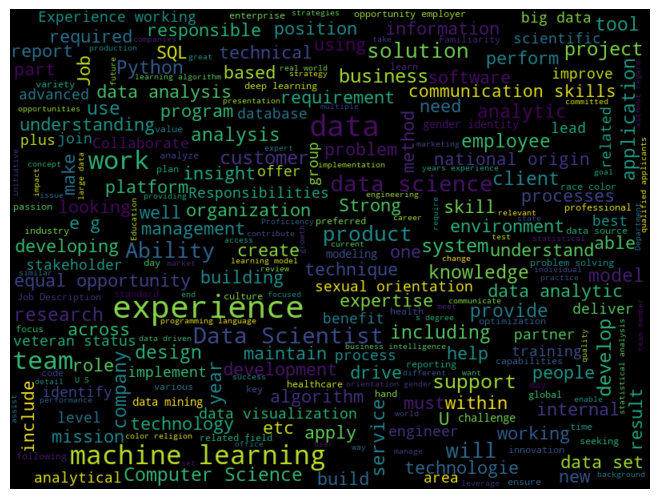

In [34]:
# Display the wordcloud of Job description column
gen_wc(df['Job Description'])

- There are lot's of information in the Job Description column
- Let's create a `Degree` Column from that information

### Degree Column

- Let's iterate through Job Description Column and find relevant words for the Degree Columns.
- with the relevent words for degrees let create some parameter for degrees. such as..
    - Ph.D | Master's | Bachelors's

In [35]:
# Create a function for the task
def get_degree(s):
    """This function will take a variable and return the words which are common in the varible"""
    s = s.lower()
    if 'phd' in s or 'doctors' in s or 'doctor' in s:
        return "Ph.D"
    
    elif "master's" in s or 'masters' in s or 'master' in s:
        return "Master's"
    
    else:
        return "Bachelor's"

In [36]:
df['Degree'] = df['Job Description'].apply(lambda x: get_degree(x))

In [37]:
df['Degree'].value_counts()

Bachelor's    387
Ph.D          140
Master's      118
Name: Degree, dtype: int64

- Now Let's create a new DataFrame to scrape some data from Job Description as Skills

## Rating Column

In [38]:
# Let's convert all the values into positive number incase if there have any negative rating..

df['Rating'] = df['Rating'].abs()

# Let's see the Highest, Lowest, Average, Median and Most-frequent rating that has given.. 

print(f"""
Highest Rating: {df['Rating'].max()}
Lowest Rating: {df['Rating'].min()}
Average Rating: {round(df['Rating'].mean(),2)}
Median Rating: {df['Rating'].median()}
Most_Frequent Rating: {df['Rating'].mode()}""")


Highest Rating: 5.0
Lowest Rating: 2.0
Average Rating: 3.88
Median Rating: 3.8
Most_Frequent Rating: 0    3.5
Name: Rating, dtype: float64


- The Average and Median Rating is same, also the Most Frequent Rating is very nearest.
- Let's feel all the null values with the Mean values of all Ratings

In [39]:
# Total Null values
print(f"Total number of null values in the Rating Column: {df['Rating'].isna().sum()}")

# Let's fill the null values with Mean
df['Rating'] = df['Rating'].fillna(round(df['Rating'].mean(),1))

# After filling 
print(f"After filling the Null valus with Mean: {df['Rating'].isna().sum()}")

Total number of null values in the Rating Column: 23
After filling the Null valus with Mean: 0


## Company Name column

In [40]:
def remove_char(value):
    if '\n' in value:
        return value.split('\n')[0].split(' ')[0]
    else:
        return value

In [41]:
df['Company_Name'] = df['Company Name'].apply(lambda x: remove_char(x))

In [42]:
df['Company_Name'].unique()

array(['Healthfirst', 'ManTech', 'Analysis', 'INFICON', 'Affinity', 'HG',
       'Novartis', 'iRobot', 'Intuit', 'XSELL', 'Novetta', '1904labs',
       'PNNL', 'Old', 'Mathematica', 'Guzman', 'Upside', 'Buckman',
       'Insight', 'Tower', 'Triplebyte', 'PulsePoint', 'Exponent',
       'Guardian', 'Spectrum', 'Oversight', 'LSQ', 'MIT', 'Kingfisher',
       'Formation', 'Cohere', 'Acuity', 'Chef', 'Puget', 'Sandhills', 'A',
       'Great-Circle', 'Edmunds.com', 'Cambridge', 'Liberty', 'Cenlar',
       'Arsenal', 'Eversight', 'Pfizer', 'Klaviyo', 'Intellectual',
       'GovTech', 'Quick', 'Giving', 'Takeda', 'Netskope', 'IT', 'iSeatz',
       'Summa', 'Benson', 'Twitter', 'Postmates', 'Envision', 'Swiss',
       'Systems', 'Dermalogica', 'Bayview', 'Via', 'Grid', 'Tempus',
       'CareDx', 'IZEA', 'Autodesk', 'Caterpillar', 'New', 'Allied',
       'The', 'IFG', 'Amyris', 'AstraZeneca', 'Powertek', 'Object',
       'Lightspeed', 'Stripe', 'Comprehensive', 'Fullpower', 'Mars',
       'NuWa

## Location Column

In [43]:
# unique locations
df['Location'].unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Remote',
       'Memphis, TN', 'Plano, TX', 'West Grove, PA', 'Phoenix, AZ',
       'Appleton, WI', 'Atlanta, GA', 'Orlando, FL', 'Lexington, MA',
       'McLean, VA', 'San Francisco, CA', 'Sheboygan, WI',
       'United States', 'Bothell, WA', 'Lincoln, NE', 'Overland Park, KS',
       'Santa Monica, CA', 'Portsmouth, NH', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Bellevue, WA',
       'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN', 'Woburn, MA',
       'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
 

- There are some location where state's short name is not mentioned after (,) 
<p>let's find those rows... </p>

In [44]:
print(f"There are total {len(df.loc[~df['Location'].str.contains(',')])} rows having location without state's short name")
print("And these are..")

# Let's create a blank list variable 'box'
box = []
# store all the data of Location column into location variable
location = df['Location']

# Iterate through for loop
for i in location:
    if ',' in i:
        pass
    else:
        box.append(i)
        var = pd.Series(box)
        
print(var.value_counts())

# # To retrive the rows..
# df.loc[~df['Location'].str.contains(',')]

There are total 23 rows having location without state's short name
And these are..
United States    11
Remote            6
Utah              2
New Jersey        2
Texas             1
California        1
dtype: int64


### 'State' Column

- Let's seperate the states into 'States' Column 
- Also fill New Jersey with 'NJ' , Texas with 'TX', Utah with 'UT', California with 'CA' and fill others by the most frequent values in the State.

In [45]:
# let's create a function to do this task
def ext_state(value):
    if ',' in value:
        return value.split(',')[1]

    else:
        if 'New Jersey' in value:
            return 'NJ'
        elif 'Utah' in value:
            return 'UT'
        elif 'Texas' in value:
            return 'TX'
        elif 'California' in value:
            return 'CA'
        else:
            return np.nan

In [46]:
# Creating a State column 
df['State'] = df['Location'].apply(lambda x: ext_state(x))

In [47]:
# Null values in State
print(f'Total null values in the `State` column : {df.State.isna().sum()}')

Total null values in the `State` column : 17


In [48]:
df.loc[df.State.isna()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Position,Seniority,Min_Salary,Max_Salary,Average_Salary,Degree,Company_Name,State
16,Data Scientist - Contract,$137K-$171K (Glassdoor est.),"We are an ambitious, well-funded startup with ...",4.1,Upside Business Travel\n4.1,Remote,"Washington, DC",51 to 200 employees,2015.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,Data Scientist,Other,137,171,154.0,Bachelor's,Upside,NaN
34,Data Engineer,$75K-$131K (Glassdoor est.),Chef Software is the industry leader in IT aut...,3.6,Chef\n3.6,United States,"Seattle, WA",201 to 500 employees,2008.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$50 to $100 million (USD),Data Engineer,Other,75,131,103.0,Master's,Chef,NaN
53,Jr. Data Engineer,$75K-$131K (Glassdoor est.),Jr. Data Engineer\n\nJob Details\nLevel\nEntry...,4.8,IT Concepts\n4.8,Remote,"Vienna, VA",51 to 200 employees,2003.0,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),Data Engineer,Junior,75,131,103.0,Bachelor's,IT,NaN
89,Data Scientist,$79K-$131K (Glassdoor est.),Back to search results\nPrevious job\n\nNext j...,3.9,Mars\n3.9,United States,"Mc Lean, VA",10000+ employees,1911.0,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),Data Scientist,Other,79,131,105.0,Bachelor's,Mars,NaN
134,Machine Learning Engineer,$90K-$109K (Glassdoor est.),Role Description\nTriplebyte screens and evalu...,3.2,Triplebyte\n3.2,Remote,"San Francisco, CA",51 to 200 employees,2015.0,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,MLE,Other,90,109,99.5,Bachelor's,Triplebyte,NaN
135,Machine Learning Engineer,$90K-$109K (Glassdoor est.),Role Description\nTriplebyte screens and evalu...,3.2,Triplebyte\n3.2,Remote,"San Francisco, CA",51 to 200 employees,2015.0,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,MLE,Other,90,109,99.5,Bachelor's,Triplebyte,NaN
199,Data Scientist - Contract,$79K-$106K (Glassdoor est.),"We are an ambitious, well-funded startup with ...",4.1,Upside Business Travel\n4.1,Remote,"Washington, DC",51 to 200 employees,2015.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,Data Scientist,Other,79,106,92.5,Bachelor's,Upside,NaN
227,Data Scientist,$71K-$123K (Glassdoor est.),About The Position\n\nREE is redefining how mo...,5.0,REE\n5.0,United States,"Tel Aviv-Yafo, Israel",51 to 200 employees,2018.0,Company - Private,Transportation Equipment Manufacturing,Manufacturing,Unknown / Non-Applicable,Data Scientist,Other,71,123,97.0,Bachelor's,REE,NaN
305,Chief Scientist,$145K-$225K(Employer est.),Why TrueAccord?\n\nDebt collection is failing ...,3.4,TrueAccord\n3.4,Remote,"San Francisco, CA",51 to 200 employees,2013.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,Other,Other,145,225,185.0,Ph.D,TrueAccord,NaN
307,Data Scientist,$145K-$225K(Employer est.),DATA SCIENTIST REMOTE working with occasional ...,3.2,Kollasoft Inc.\n3.2,United States,"Scottsdale, AZ",1 to 50 employees,NaN,Company - Private,IT Services,Information Technology,$1 to $5 million (USD),Data Scientist,Other,145,225,185.0,Ph.D,Kollasoft,NaN


- Now fill the most freequent State to those Null values in the 'State' Column

In [49]:
df['State'] = df['State'].fillna(df['State'].mode()[0])

In [50]:
df['State'].value_counts()

 CA              164
 VA               86
 MA               60
 NY               51
 MD               39
 IL               29
 DC               26
 TX               17
 WA               15
 OH               14
 MO               12
 PA               12
 CO               10
 NJ               10
 NC                9
 GA                9
 TN                8
 FL                8
 WI                6
 OK                6
 MI                5
 IN                5
 AL                4
 MN                4
 CT                4
 AZ                4
 UT                3
 IA                3
 RI                2
UT                 2
NJ                 2
 OR                2
 SC                2
 NH                2
 NE                2
 DE                1
CA                 1
 Anne Arundel      1
 LA                1
TX                 1
 MS                1
 KS                1
 WV                1
Name: State, dtype: int64

- Now clear those unnessecary space and replace Anne Arundel with 'AA'

In [51]:
df['State'] = df['State'].apply(lambda x: x.replace('Anne Arundel', 'AA').replace(' ',''))

In [52]:
df['State'].value_counts()

CA    165
VA     86
MA     60
NY     51
MD     39
IL     29
DC     26
TX     18
WA     15
OH     14
NJ     12
PA     12
MO     12
CO     10
GA      9
NC      9
TN      8
FL      8
WI      6
OK      6
IN      5
MI      5
UT      5
AL      4
MN      4
CT      4
AZ      4
IA      3
OR      2
SC      2
RI      2
NE      2
NH      2
DE      1
AA      1
LA      1
MS      1
KS      1
WV      1
Name: State, dtype: int64

### 'Job Type' Column

- Add a new column 'Job Type'

In [53]:
# Creating a Job Type Column to showcase whether the Job is Remore or Onsite

df['Job_Type'] = df['Location'].apply(lambda x: 'Remote' if 'Remote' in x else 'Onsite')

In [54]:
df['Job_Type'].value_counts()

Onsite    639
Remote      6
Name: Job_Type, dtype: int64

## Headquarters Column

In [55]:
# The Most Frequent Headquarters
print(f"The most frequent Headquarters mentioned in the Dataset: {df['Headquarters'].mode()[0]}")

# Total Null values before filling
print(f"The total Null values in the Headquarters column: {df['Headquarters'].isna().sum()}")

# Filling with mode
df['Headquarters'] = df['Headquarters'].fillna(df['Headquarters'].mode()[0])

# After filling
print(f"Total Null values after filling it with mode: {df['Headquarters'].isna().sum()}")


The most frequent Headquarters mentioned in the Dataset: New York, NY
The total Null values in the Headquarters column: 4
Total Null values after filling it with mode: 0


In [56]:
df.isna().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded              91
Type of ownership     0
Industry             44
Sector               44
Revenue               0
Position              0
Seniority             0
Min_Salary            0
Max_Salary            0
Average_Salary        0
Degree                0
Company_Name          0
State                 0
Job_Type              0
dtype: int64

## 'Size' Column

In [57]:
# Showing Unique values with count
df['Size'].value_counts()

51 to 200 employees        135
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        85
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
Unknown                     17
Name: Size, dtype: int64

- let's trim and split the data by "to" and make two column ie. 'Min_Size' and 'Max_Size'

### Min_Size Column

In [58]:
# Create a function to do the task
def get_min_size(string):
    if "to" in string.lower():
        value = string.split("to")[0].replace(" ","")
        final = int(value)
        return final
    else:
        return string.replace("+ employees","")
        

In [59]:
# Apply the function on Size column
df['Min_Size'] = df['Size'].apply(lambda x: get_min_size(x))

df['Min_Size'].value_counts()

51         135
1001       104
1           86
201         85
10000       80
501         77
5001        61
Unknown     17
Name: Min_Size, dtype: int64

- Now Let's replace the Unknown with median value of Min_Size
- Convert the Data type into integer

In [60]:
# Replace "Unknown" with Null values
df['Min_Size'] = df['Min_Size'].replace("Unknown", np.nan)

# Convert the datatype to numeric
df['Min_Size'] = pd.to_numeric(df['Min_Size'])

# Fill the null values with median 
df['Min_Size'] = df['Min_Size'].fillna(df['Min_Size'].median())

# Change the data type into Integer
df['Min_Size'] = df['Min_Size'].astype(int)

# final_output
df['Min_Size'].value_counts()

51       135
1001     104
501       94
1         86
201       85
10000     80
5001      61
Name: Min_Size, dtype: int64

### Max_Size columnm

In [61]:
# Create a function for the task
def get_max_size(string):
    if "to" in string.lower():
        return string.split("to")[1].replace(" employees","").replace(" ","")
    else:
        return string.replace("+ employees","").replace(" ","")


In [62]:
# Let's apply that to Size Column
df['Max_Size'] = df['Size'].apply(lambda x: get_max_size(x))

df['Max_Size'].value_counts()

10000      141
200        135
5000       104
50          86
500         85
1000        77
Unknown     17
Name: Max_Size, dtype: int64

- Let's replace the Unknown with median value of df['Max_Size']
- Convert the Data type into integer

In [63]:
# Replace "Unknown" with Null values
df['Max_Size'] = df['Max_Size'].replace("Unknown", np.nan)

# Convert the datatype to numeric
df['Max_Size'] = pd.to_numeric(df['Max_Size'])

# Fill the null values with median 
df['Max_Size'] = df['Max_Size'].fillna(df['Max_Size'].median())

# Change the data type into Integer
df['Max_Size'] = df['Max_Size'].astype(int)

# final_output
df['Max_Size'].value_counts()

10000    141
200      135
5000     104
1000      94
50        86
500       85
Name: Max_Size, dtype: int64

- Now let's Create the Average_Size Column

### Average_Size Column

In [64]:
df['Average_Size'] = (df['Min_Size'] + df['Max_Size']) / 2

# Let's Change the datatype in to integer and round the figure 
df['Average_Size'] = df['Average_Size'].astype(int)
df['Average_Size'] = round(df['Average_Size'])

# Showing Unique value and counts
df['Average_Size'].value_counts()

125      135
3000     104
750       94
25        86
350       85
10000     80
7500      61
Name: Average_Size, dtype: int64

## Type of ownership column

In [65]:
# Let's retrive the unique values..
df['Type of ownership'].value_counts()

Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: Type of ownership, dtype: int64

- **Let's distribute and group all the `Type of ownership` values into six different group i.e..**
    - Private
    - Public
    - Nonprofit Organization as NGO
    - Subsidiary or Business Segment as SOBS
    - Government
    - Others

- *store these values into a new column as `Ownership`*

### 'Ownership' Coulmn 

In [66]:
# Create a function for the task

def get_ownership(data):
    if 'Private' in data.title():
        return "Private"
    elif "Public" in data.title():
        return "Public"
    elif "Nonprofit Organization" in data.title():
        return "NGO"
    elif "Subsidiary Or Business Segment" in data.title():
        return "SOBS"
    elif "Government" in data.title():
        return "Government"
    else:
        return "Others"

In [67]:
# Apply the function..
df['Ownership'] = df['Type of ownership'].apply(lambda x: get_ownership(x))

# Showing unique values..
df['Ownership'].value_counts()

Private       401
Public        153
NGO            36
SOBS           28
Others         17
Government     10
Name: Ownership, dtype: int64

## Founded Column

In [68]:
# Let's convert all the values into positive number incase if there have any negative...
df['Founded'] = df['Founded'].abs()

# Let's see the Year range and Most-frequent Year that has given..
print(f"""
Range of Years in Founded Column: {df['Founded'].min()} - {df['Founded'].max()}
Most Frequent Year in Founded Column: {df['Founded'].mode()[0]}""")



Range of Years in Founded Column: 1781.0 - 2019.0
Most Frequent Year in Founded Column: 2012.0


- Let's fill the null value with the most frequent values

In [69]:
# Total Null values before filling
print(f"Total Null Values in the column Founded: {df['Founded'].isna().sum()}")

# Filling Null values with most frequent values
df['Founded'] = df['Founded'].fillna(df['Founded'].mode()[0])

 # After filling
print(f"Null Values after filling with mode: {df['Founded'].isna().sum()}")


Total Null Values in the column Founded: 91
Null Values after filling with mode: 0


- Convert `Founded` to Integer

In [70]:
df['Founded'] = df['Founded'].astype(int)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 671
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          645 non-null    object 
 1   Salary Estimate    645 non-null    object 
 2   Job Description    645 non-null    object 
 3   Rating             645 non-null    float64
 4   Company Name       645 non-null    object 
 5   Location           645 non-null    object 
 6   Headquarters       645 non-null    object 
 7   Size               645 non-null    object 
 8   Founded            645 non-null    int32  
 9   Type of ownership  645 non-null    object 
 10  Industry           601 non-null    object 
 11  Sector             601 non-null    object 
 12  Revenue            645 non-null    object 
 13  Position           645 non-null    object 
 14  Seniority          645 non-null    object 
 15  Min_Salary         645 non-null    int32  
 16  Max_Salary         645 non

- Since Industry and Sector both are categorical columns let's fill the null values with mode

## Industry Column


In [72]:
# Most Frequent Industry
print(f"The Most Frequent Industry mentioned in the Dataframe: {df['Industry'].mode()[0]}")

The Most Frequent Industry mentioned in the Dataframe: Biotech & Pharmaceuticals


In [73]:
# Total Null values
print(f"Total Null values in Industry column: {df['Industry'].isna().sum()}")

# Filling Null values with mode
df['Industry'] = df['Industry'].fillna(df['Industry'].mode()[0])

# After filling
print(f"After filling Null valus with mode: {df['Industry'].isna().sum()}")

Total Null values in Industry column: 44
After filling Null valus with mode: 0


## Sector Column


In [74]:
# Most Frequent Sectors
print(f"The Most Frequent Sectors mentioned in the Dataframe: {df['Sector'].mode()[0]}")

The Most Frequent Sectors mentioned in the Dataframe: Information Technology


In [75]:
# Total Null values
print(f"Total Null values in Sectors column: {df['Sector'].isna().sum()}")

# Filling Null values with mode
df['Sector'] = df['Sector'].fillna(df['Sector'].mode()[0])

# After filling
print(f"After filling Null valus with mode: {df['Sector'].isna().sum()}")

Total Null values in Sectors column: 44
After filling Null valus with mode: 0


In [76]:
df.isna().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Position             0
Seniority            0
Min_Salary           0
Max_Salary           0
Average_Salary       0
Degree               0
Company_Name         0
State                0
Job_Type             0
Min_Size             0
Max_Size             0
Average_Size         0
Ownership            0
dtype: int64

## Revenue Column

In [77]:
# Let's see the unique values with counts
df['Revenue'].value_counts()

Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: Revenue, dtype: int64

- There is a variable 'Unknown / Non-Applicable' representing as missing values

In [78]:

substring = 'Unknown / Non-Applicable'
# df[df.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
rev_missing = df.loc[df['Revenue'].str.contains(substring)]

print(f"The number of missing values in the Revenue Column: {len(rev_missing)}")

# rev_missing

The number of missing values in the Revenue Column: 213


- Now Let's replace '$' , '+', 'Less than' and (USD) with ''
- 'to' and 'million/billion' will be useful for later operation

In [79]:
df['Revenue'] = df['Revenue'].apply(lambda x: x.replace("$",'').replace("+",'').replace("(USD)", '').replace("Less than ", ''))

- Let's replace 'Unknown / Non-Applicable' with a Null value then do the operationm

In [80]:
df['Revenue'].value_counts()

Unknown / Non-Applicable     213
100 to 500 million            94
10 billion                    63
2 to 5 billion                45
10 to 25 million              41
1 to 2 billion                36
25 to 50 million              36
50 to 100 million             31
1 to 5 million                31
500 million to 1 billion      19
5 to 10 million               14
1 million                     14
5 to 10 billion                8
Name: Revenue, dtype: int64

### 'Min_Revenue' column

- Let's Create a column for Minimum Revenue

In [81]:
# Let's Create a Function to extract first value of the range with million or billion tag
def ext_min_rev(string):
    if "to" in string:
        if "million to 1 billion" in string: # for a perticular category
            string.replace(" billion",'')
            value = string.split("to")[0]
            return (value)
        
        elif "billion" in string: # for all billion values
            value = string.split("to")[0]
            return (value+" billion")
        
        elif "million" in string: # for all million values
            value = string.split("to")[0]
            return (value+" million")
               
    else:
        return string
    

In [82]:
df['Min_Revenue'] = df['Revenue'].apply(lambda x: ext_min_rev(x))

In [83]:
df['Min_Revenue'].value_counts()

Unknown / Non-Applicable    213
100  million                 94
10 billion                   63
2  billion                   45
10  million                  41
1  billion                   36
25  million                  36
50  million                  31
1  million                   31
500 million                  19
5  million                   14
1 million                    14
5  billion                    8
Name: Min_Revenue, dtype: int64

- Now replace all those million and billions and convert evey values into million ( 1 billion = 1000 million)
- Change the datatype into neumeric
- Replace "Unknown / Non-Applicable" with 0
- Fill all the 0 with the median value of the 'Min_Revenue' column

In [84]:
# Create a function get_min_rev to perform the task

def get_min_rev(rev):
    if "Unknown / Non-Applicable" in rev:
        # value = rev.replace("Unknown / Non-Applicable",int(0))
        return int(0)
    if "billion" in rev:
        value = rev.replace("billion", '').replace(' ','')
        final = int(value) * 1000
        return final
    else:
        return rev.replace("million", '').replace(' ','')

In [85]:
# Let's apply the method..

df['Min_Revenue'] = df['Min_Revenue'].apply(lambda x: get_min_rev(x))

# Convert to numeric
df['Min_Revenue'] = pd.to_numeric(df['Min_Revenue'])

df['Min_Revenue'].value_counts()

0        213
100       94
10000     63
2000      45
1         45
10        41
1000      36
25        36
50        31
500       19
5         14
5000       8
Name: Min_Revenue, dtype: int64

In [86]:
# Let's fill all the 0 with median..

df['Min_Revenue'] = df['Min_Revenue'].replace(0, np.nan) # Let's replace it with null
median = df['Min_Revenue'].median()
df['Min_Revenue'].fillna(round(median,2), inplace=True)

df['Min_Revenue'].value_counts()

100.0      307
10000.0     63
2000.0      45
1.0         45
10.0        41
1000.0      36
25.0        36
50.0        31
500.0       19
5.0         14
5000.0       8
Name: Min_Revenue, dtype: int64

### 'Max_Revenue' Column
- Let's do the similar task to create the 'Max_Revenue' column with maximum value from the 'Revenue' column

In [87]:
df['Revenue'].value_counts()

Unknown / Non-Applicable     213
100 to 500 million            94
10 billion                    63
2 to 5 billion                45
10 to 25 million              41
1 to 2 billion                36
25 to 50 million              36
50 to 100 million             31
1 to 5 million                31
500 million to 1 billion      19
5 to 10 million               14
1 million                     14
5 to 10 billion                8
Name: Revenue, dtype: int64

In [88]:
# Let's Create a Function to extract second value of the range with million or billion tag
def ext_max_rev(string):
    if "to" in string:
        if "million to 1 billion" in string: # for a perticular category
            string.replace(" billion",'')
            value = string.split("to")[1]
            return (value)
        
        elif "billion" in string: # for all billion values
            value = string.split("to")[1]
            return (value)
        
        elif "million" in string: # for all million values
            value = string.split("to")[1]
            return (value)
               
    else:
        return string
    

In [89]:
# Let's apply the method..

df['Max_Revenue'] = df['Revenue'].apply(lambda x: ext_max_rev(x))

df['Max_Revenue'].value_counts()

Unknown / Non-Applicable    213
 500 million                 94
10 billion                   63
 5 billion                   45
 25 million                  41
 2 billion                   36
 50 million                  36
 100 million                 31
 5 million                   31
 1 billion                   19
 10 million                  14
1 million                    14
 10 billion                   8
Name: Max_Revenue, dtype: int64

- Now replace all those million and billions and convert evey values into million ( 1 billion = 1000 million)
- Change the datatype into neumeric
- Replace "Unknown / Non-Applicable" with 0
- Fill all the 0 with the median value of the 'Min_Revenue' column

In [90]:
# Create a function get_max_rev to perform the task

def get_max_rev(rev):
    if "Unknown / Non-Applicable" in rev:
        # value = rev.replace("Unknown / Non-Applicable",int(0))
        return int(0)
    if "billion" in rev:
        value = rev.replace("billion", '').replace(' ','')
        final = int(value) * 1000
        return final
    else:
        return rev.replace("million", '').replace(' ','')

In [91]:
# Let's apply the method..

df['Max_Revenue'] = df['Max_Revenue'].apply(lambda x: get_max_rev(x))

# Convert to numeric(float)
df['Max_Revenue'] = pd.to_numeric(df['Max_Revenue'])

df['Max_Revenue'].value_counts()

0        213
500       94
10000     71
5000      45
25        41
2000      36
50        36
100       31
5         31
1000      19
10        14
1         14
Name: Max_Revenue, dtype: int64

In [92]:
# Let's fill all the 0 with median..

df['Max_Revenue'] = df['Max_Revenue'].replace(0, np.nan) # Let's replace it with null
median = df['Max_Revenue'].median()
df['Max_Revenue'].fillna(round(median,2), inplace=True)

df['Max_Revenue'].value_counts()

500.0      307
10000.0     71
5000.0      45
25.0        41
2000.0      36
50.0        36
100.0       31
5.0         31
1000.0      19
10.0        14
1.0         14
Name: Max_Revenue, dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 671
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          645 non-null    object 
 1   Salary Estimate    645 non-null    object 
 2   Job Description    645 non-null    object 
 3   Rating             645 non-null    float64
 4   Company Name       645 non-null    object 
 5   Location           645 non-null    object 
 6   Headquarters       645 non-null    object 
 7   Size               645 non-null    object 
 8   Founded            645 non-null    int32  
 9   Type of ownership  645 non-null    object 
 10  Industry           645 non-null    object 
 11  Sector             645 non-null    object 
 12  Revenue            645 non-null    object 
 13  Position           645 non-null    object 
 14  Seniority          645 non-null    object 
 15  Min_Salary         645 non-null    int32  
 16  Max_Salary         645 non

### 'Average Revenue' Column
- Finally Create the 'Average Revenue' column

In [94]:
# Creating a variable for the calculation and 
average_revenue = (df['Min_Revenue'] + df['Max_Revenue'] ) / 2 

# Let's apply..
df['Average_Revenue'] = round(average_revenue,2) # rounding the value with 2 digit after decimal

In [95]:
df['Average_Revenue'].value_counts()

300.0      307
10000.0     63
3500.0      45
17.5        41
1500.0      36
37.5        36
75.0        31
3.0         31
750.0       19
7.5         14
1.0         14
7500.0       8
Name: Average_Revenue, dtype: int64

- Let's create a new column called 'Status'
- And distribute the Average Revenue into two Distinct Group as Millionaire and Billionaire

### 'Status' Column

In [96]:
# Let's create a function for the task

def get_status(rev):
    if rev == 1000 or rev > 1000:  # 1 Billion = 1000 Million
        return "Billionaire"
    else:
        return "Millionaire"

In [97]:
# Let's apply the function on Average_Revenue column
# create a variable avg_rev to record the column value
avg_rev =  df['Average_Revenue']

# STORE THE VALUES INTO 'Status' COLUMN
df['Status'] = avg_rev.apply(lambda x: get_status(x))

In [98]:
df['Status'].value_counts()

Millionaire    493
Billionaire    152
Name: Status, dtype: int64

In [99]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Position,Seniority,Min_Salary,Max_Salary,Average_Salary,Degree,Company_Name,State,Job_Type,Min_Size,Max_Size,Average_Size,Ownership,Min_Revenue,Max_Revenue,Average_Revenue,Status
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Other,137,171,154.0,Master's,Healthfirst,NY,Onsite,1001,5000,3000,NGO,100.0,500.0,300.0,Millionaire
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,1 to 2 billion,Data Scientist,Other,137,171,154.0,Bachelor's,ManTech,VA,Onsite,5001,10000,7500,Public,1000.0,2000.0,1500.0,Billionaire
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,100 to 500 million,Data Scientist,Other,137,171,154.0,Ph.D,Analysis,MA,Onsite,1001,5000,3000,Private,100.0,500.0,300.0,Millionaire
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,100 to 500 million,Data Scientist,Other,137,171,154.0,Bachelor's,INFICON,MA,Onsite,501,1000,750,Public,100.0,500.0,300.0,Millionaire
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,Other,137,171,154.0,Bachelor's,Affinity,NY,Onsite,51,200,125,Private,100.0,500.0,300.0,Millionaire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Data Scientist,$105K-$167K (Glassdoor est.),Criterion Systems seeks a Data Scientist to su...,3.8,"Criterion Systems, Inc.\n3.8","Vienna, VA","Vienna, VA",201 to 500 employees,2005,Company - Private,IT Services,Information Technology,50 to 100 million,Data Scientist,Other,105,167,136.0,Bachelor's,Criterion,VA,Onsite,201,500,350,Private,50.0,100.0,75.0,Millionaire
666,Data Scientist,$105K-$167K (Glassdoor est.),About Foundation Medicine:\n\nFoundation Medic...,4.0,Foundation Medicine\n4.0,"Boston, MA","Cambridge, MA",1001 to 5000 employees,2010,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,100 to 500 million,Data Scientist,Other,105,167,136.0,Ph.D,Foundation,MA,Onsite,1001,5000,3000,Public,100.0,500.0,300.0,Millionaire
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,Other,105,167,136.0,Bachelor's,TRANZACT,NJ,Onsite,1001,5000,3000,Private,100.0,500.0,300.0,Millionaire
670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2012,Company - Private,Advertising & Marketing,Business Services,1 to 5 million,Data Scientist,Other,105,167,136.0,Ph.D,ChaTeck,CA,Onsite,1,50,25,Private,1.0,5.0,3.0,Millionaire


# Dataset Preparetion

In [100]:
job_data = df.drop(columns=(['Job Title','Salary Estimate','Company Name', 'Size', 'Type of ownership', 'Revenue', 'Min_Revenue', 'Max_Revenue', 'Min_Salary', 'Max_Salary', 'Min_Size', 'Max_Size'])).copy()

In [101]:
job_data.head()

,Job Description,Rating,Location,Headquarters,Founded,Industry,Sector,Position,Seniority,Average_Salary,Degree,Company_Name,State,Job_Type,Average_Size,Ownership,Average_Revenue,Status
0,Description\n\nThe Senior Data Scientist is re...,3.1,"New York, NY","New York, NY",1993,Insurance Carriers,Insurance,Data Scientist,Other,154.0,Master's,Healthfirst,NY,Onsite,3000,NGO,300.0,Millionaire
1,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,"Chantilly, VA","Herndon, VA",1968,Research & Development,Business Services,Data Scientist,Other,154.0,Bachelor's,ManTech,VA,Onsite,7500,Public,1500.0,Billionaire
2,Overview\n\n\nAnalysis Group is one of the lar...,3.8,"Boston, MA","Boston, MA",1981,Consulting,Business Services,Data Scientist,Other,154.0,Ph.D,Analysis,MA,Onsite,3000,Private,300.0,Millionaire
3,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,"Newton, MA","Bad Ragaz, Switzerland",2000,Electrical & Electronic Manufacturing,Manufacturing,Data Scientist,Other,154.0,Bachelor's,INFICON,MA,Onsite,750,Public,300.0,Millionaire
4,Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY","New York, NY",1998,Advertising & Marketing,Business Services,Data Scientist,Other,154.0,Bachelor's,Affinity,NY,Onsite,125,Private,300.0,Millionaire


- Let's Export the cleaned data frame into `Glassdoor_job_data_cleaned.csv`

In [102]:
job_data.to_csv('Glassdoor_job_data_cleaned.csv', index=False)

# Data Visualization

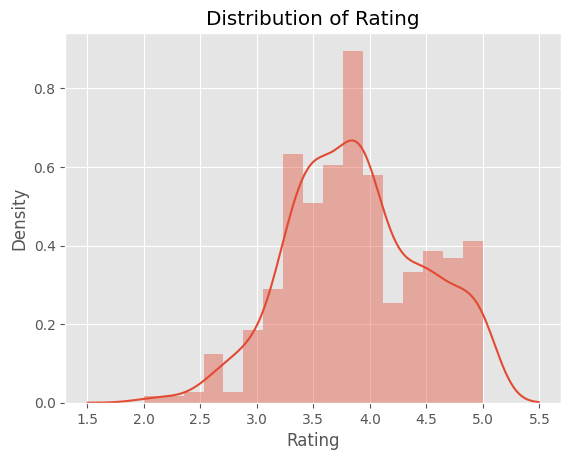

In [103]:
# plot the distribution of Rating Column
ax = sns.distplot(df['Rating'])
ax.set_title('Distribution of Rating');

<h3> Qs. Find top 10 companies by Rating.. </h3>

In [104]:
top_10_company_rating = pd.DataFrame(job_data.groupby('Rating')['Company_Name', 'Rating'].head())

In [105]:
top_10_company_rating.sort_values('Rating', ascending=False).reset_index(drop=True).head(10)

,Company_Name,Rating
0,Arsenal,5.0
1,Phantom,5.0
2,Cohere,5.0
3,Arsenal,5.0
4,Notion,5.0
5,The,4.9
6,Avlino,4.9
7,New,4.9
8,Lendio,4.9
9,Big,4.9


<h3> Qs. Find TOP 10 location having most jobs </h3>

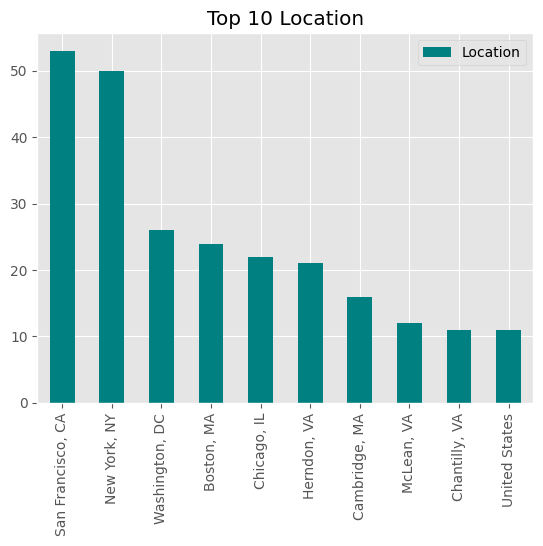

In [106]:
# Location value_counts
pd.DataFrame(job_data.Location.value_counts().head(10)).plot(kind='bar', color='teal')
plt.title('Top 10 Location');

### Qs. Plot a distribution of years in the `Founded` Column

In [107]:
job_data.head()

,Job Description,Rating,Location,Headquarters,Founded,Industry,Sector,Position,Seniority,Average_Salary,Degree,Company_Name,State,Job_Type,Average_Size,Ownership,Average_Revenue,Status
0,Description\n\nThe Senior Data Scientist is re...,3.1,"New York, NY","New York, NY",1993,Insurance Carriers,Insurance,Data Scientist,Other,154.0,Master's,Healthfirst,NY,Onsite,3000,NGO,300.0,Millionaire
1,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,"Chantilly, VA","Herndon, VA",1968,Research & Development,Business Services,Data Scientist,Other,154.0,Bachelor's,ManTech,VA,Onsite,7500,Public,1500.0,Billionaire
2,Overview\n\n\nAnalysis Group is one of the lar...,3.8,"Boston, MA","Boston, MA",1981,Consulting,Business Services,Data Scientist,Other,154.0,Ph.D,Analysis,MA,Onsite,3000,Private,300.0,Millionaire
3,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,"Newton, MA","Bad Ragaz, Switzerland",2000,Electrical & Electronic Manufacturing,Manufacturing,Data Scientist,Other,154.0,Bachelor's,INFICON,MA,Onsite,750,Public,300.0,Millionaire
4,Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY","New York, NY",1998,Advertising & Marketing,Business Services,Data Scientist,Other,154.0,Bachelor's,Affinity,NY,Onsite,125,Private,300.0,Millionaire


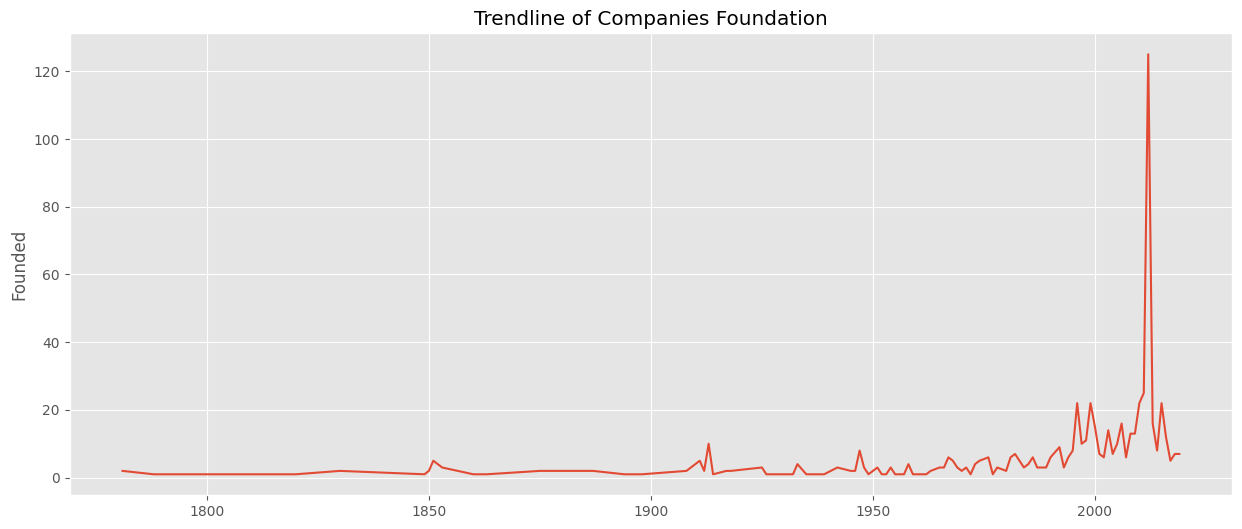

In [108]:
plt.figure(figsize=(15,6))
sns.lineplot(job_data['Founded'].value_counts())
plt.title('Trendline of Companies Foundation');

### Qs. Plot TOP 10 `Industry`

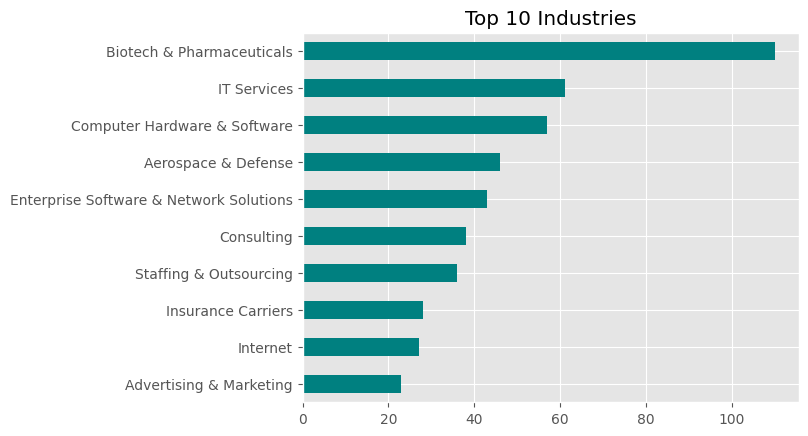

In [109]:
ax = job_data.Industry.value_counts().head(10).plot(kind='barh', title='Top 10 Industries', color='teal')
ax.invert_yaxis()

### Qs. Top 10 Sectors

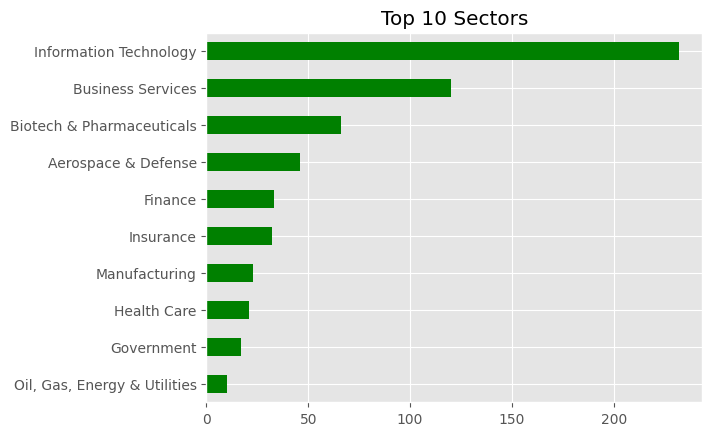

In [110]:
ax = job_data.Sector.value_counts().head(10).plot(kind='barh', title='Top 10 Sectors', color='green')
ax.invert_yaxis();

### Qs. Top Positions for jobs

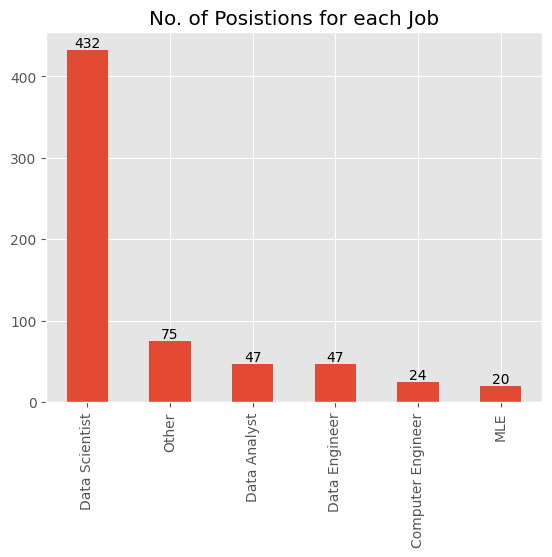

In [111]:
ax = job_data.Position.value_counts().plot(kind='bar', title="No. of Posistions for each Job")

# Add Data lebel for each bar
for container in ax.containers:
    ax.bar_label(container)

### Qs. Plot the Distribution of `Average Salary`

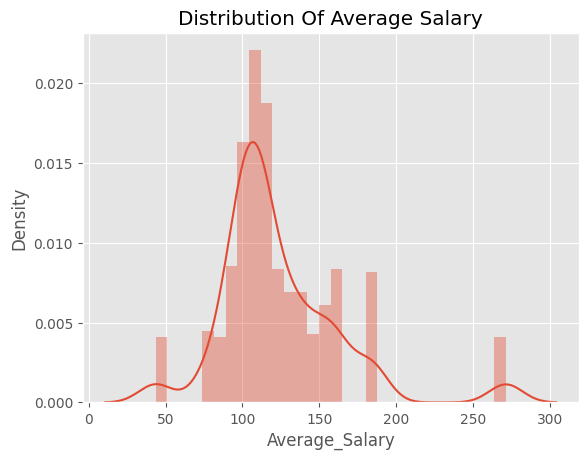

In [112]:
sns.distplot(job_data.Average_Salary)
plt.title('Distribution Of Average Salary');

### Qs. Plot the `Average Salary` by `Sector`

In [113]:
average_sal_by_sector = job_data.groupby('Sector')['Sector', 'Average_Salary'].mean()

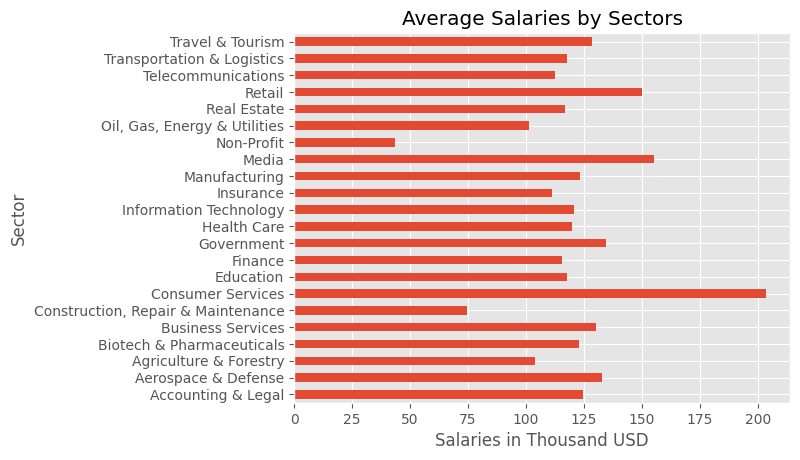

In [114]:
ax = average_sal_by_sector.plot(kind='barh', title='Average Salaries by Sectors', legend=False)
ax.set_xlabel('Salaries in Thousand USD');

### QS. Average Salaries by `Degree`

In [115]:
job_data.groupby('Degree')['Degree', 'Average_Salary'].mean()

,Average_Salary
Degree,
Bachelor's,123.483204
Master's,122.864407
Ph.D,123.460714


### Qs. Onsite vs Remote Jobs

In [116]:
job_data.Job_Type.value_counts()

Onsite    639
Remote      6
Name: Job_Type, dtype: int64

### Qs. Plot the distribution of `Average_Size`

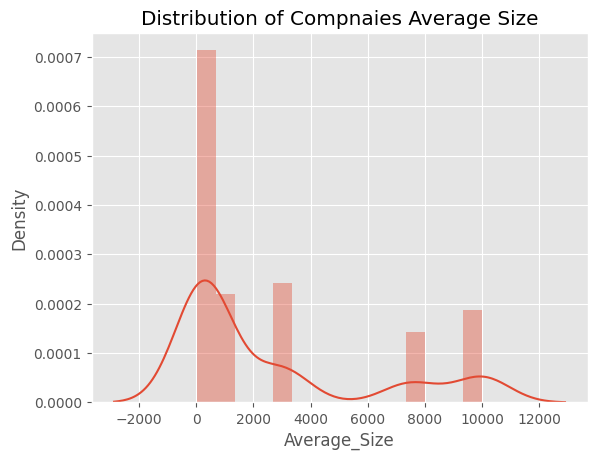

In [117]:
sns.distplot(job_data['Average_Size'])
plt.title('Distribution of Compnaies Average Size');

### Qs. TOP 10 Company by `Rating` vs their `Average_Size`

In [118]:
top_10_company_rating_vs_size = pd.DataFrame(job_data.groupby('Rating')['Company_Name', 'Rating', 'Average_Size'].head()).sort_values('Rating', ascending=False).head(10)

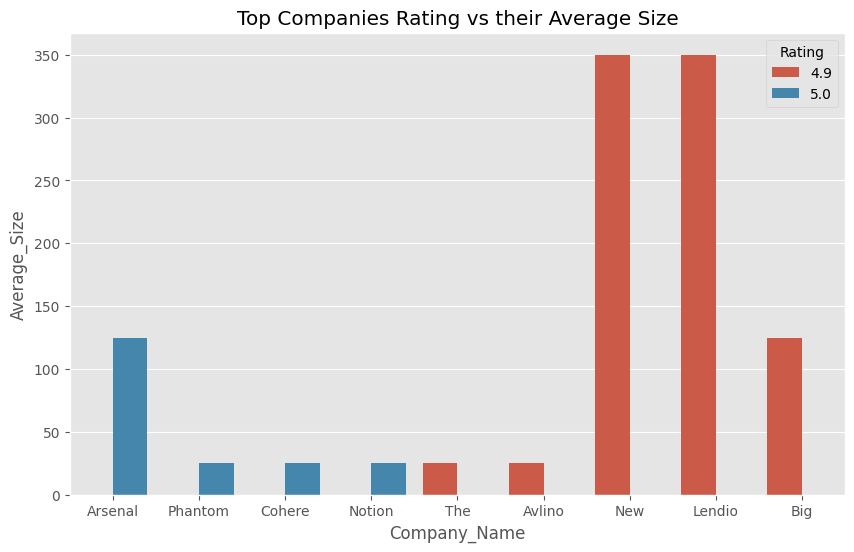

In [119]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_company_rating_vs_size, x='Company_Name', y='Average_Size', hue='Rating')
plt.title('Top Companies Rating vs their Average Size');

### Plot the number of companies within a specific `Ownership`

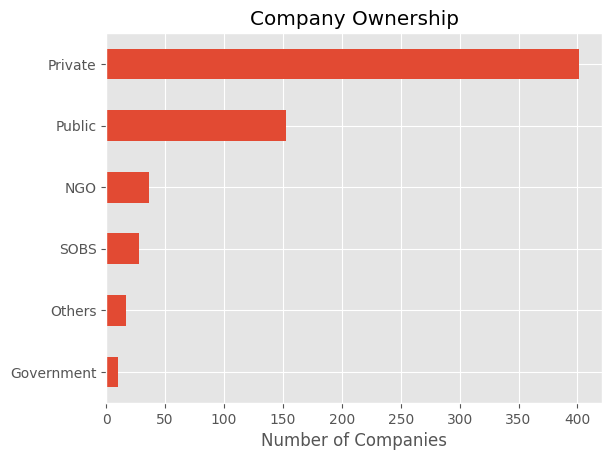

In [120]:
ax = job_data.Ownership.value_counts().plot(kind='barh', title='Company Ownership')
ax.invert_yaxis()
ax.set_xlabel('Number of Companies');

### Qs. Plot the `Average_Revenue` by Company `Ownership` 

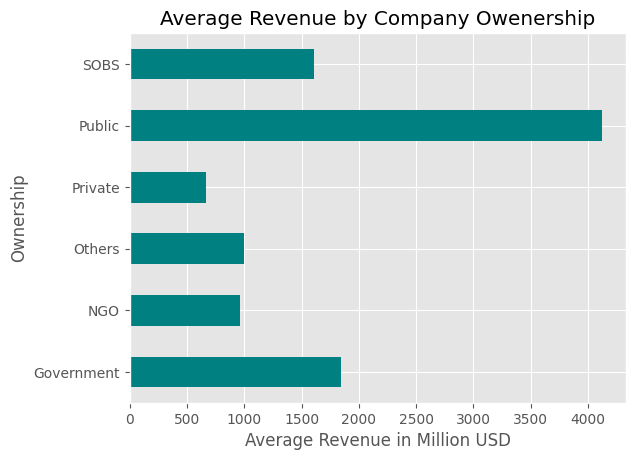

In [121]:
ax = pd.DataFrame(job_data.groupby('Ownership')['Ownership', 'Average_Revenue'].mean()).plot(kind='barh', color='teal', legend=False,
                                                                                       title='Average Revenue by Company Owenership')
ax.set_xlabel('Average Revenue in Million USD');

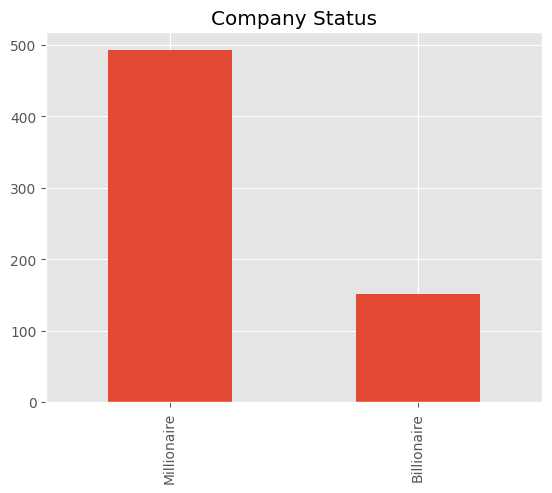

In [122]:
job_data.Status.value_counts().plot(kind='bar', title='Company Status');

### Qs. Jobs Demand by `Degree`

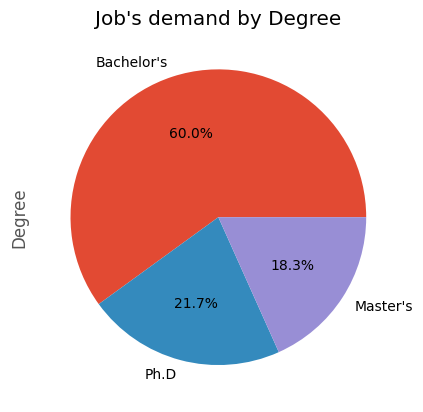

In [123]:
job_data['Degree'].value_counts().plot(kind='pie', title="Job's demand by Degree", autopct='%.1f%%');

### Qs. Most demanding skills..

- Let's create two data frame to extract `Hard Skills` and `Soft Skills` from `Job Description` Column

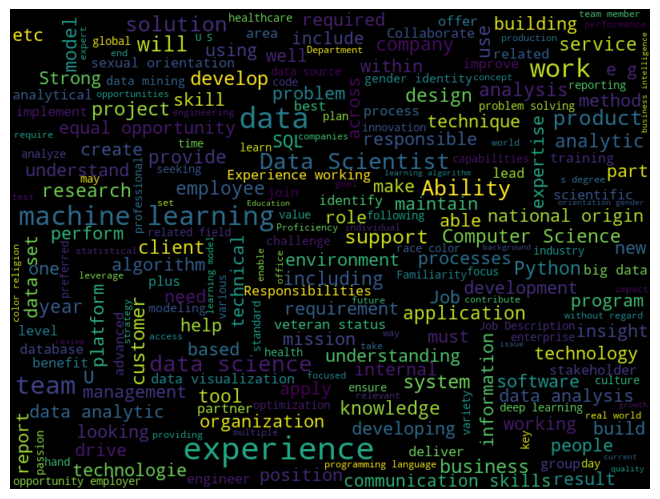

In [124]:
# Create a wordcloud for the Job Description
gen_wc(job_data['Job Description'])

In [125]:
# Create a blank dataframe for hard skills 
df_hard_skills = pd.DataFrame()

In [126]:
df_hard_skills['Python'] = job_data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

df_hard_skills['Sql'] = job_data['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)

df_hard_skills['AWS'] = job_data['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

df_hard_skills['R studio'] = job_data['Job Description'].apply(lambda x: 1 if 'r studio' or 'r programming' in x.lower() else 0)

df_hard_skills['Apache Spark'] = job_data['Job Description'].apply(lambda x: 1 if 'apache' or 'spark' in x.lower() else 0)

df_hard_skills['Excel'] = job_data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

df_hard_skills['Power BI'] = job_data['Job Description'].apply(lambda x: 1 if 'powerbi' or 'power bi' in x.lower() else 0)

df_hard_skills['Tableue'] = job_data['Job Description'].apply(lambda x: 1 if 'machine' or 'ml' in x.lower() else 0)

df_hard_skills['Apache Hadoop'] = job_data['Job Description'].apply(lambda x: 1 if 'apache' or 'hadoop' in x.lower() else 0)

df_hard_skills['Mongo DB'] = job_data['Job Description'].apply(lambda x: 1 if 'mongo' or 'mongodb' or 'mongo db' in x.lower() else 0)

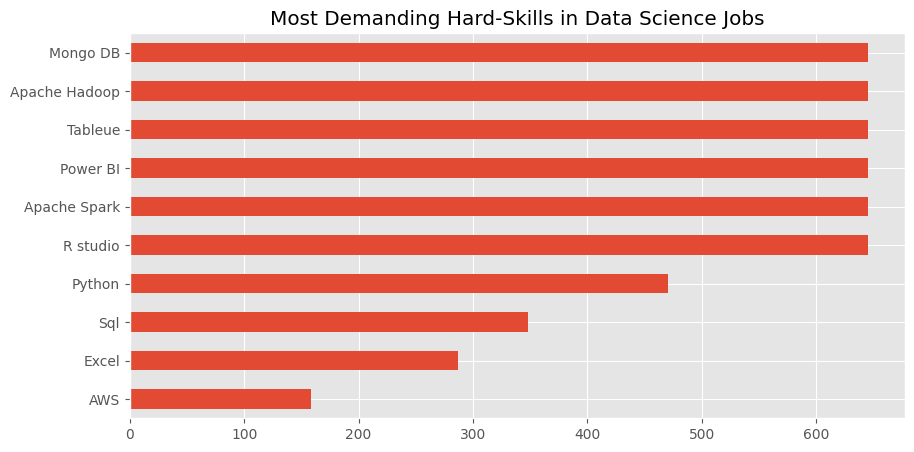

In [127]:
plt.figure(figsize=(10, 5))
df_hard_skills.sum().sort_values().plot(kind='barh', title='Most Demanding Hard-Skills in Data Science Jobs');

In [128]:
# Create a Blank Dataframe for Soft Skills
df_soft_skills = pd.DataFrame()

In [129]:
df_soft_skills['Communication'] = job_data['Job Description'].apply(lambda x: 1 if 'communication skills' in x.lower() else 0)

df_soft_skills['Critical Thinking'] = job_data['Job Description'].apply(lambda x: 1 if 'critical thinking' in x.lower() else 0)

df_soft_skills['Decision Making'] = job_data['Job Description'].apply(lambda x: 1 if 'decision making' in x.lower() else 0)

df_soft_skills['Problem Solving'] = job_data['Job Description'].apply(lambda x: 1 if 'problem solving' in x.lower() else 0)

df_soft_skills['Creativity'] = job_data['Job Description'].apply(lambda x: 1 if 'creativity' in x.lower() else 0)

df_soft_skills['Teamwork'] = job_data['Job Description'].apply(lambda x: 1 if 'teamwork' in x.lower() else 0)

df_soft_skills['Time Management'] = job_data['Job Description'].apply(lambda x: 1 if 'time management' in x.lower() else 0)

df_soft_skills['Storytelling'] = job_data['Job Description'].apply(lambda x: 1 if 'story telling' or 'storytelling' in x.lower() else 0)

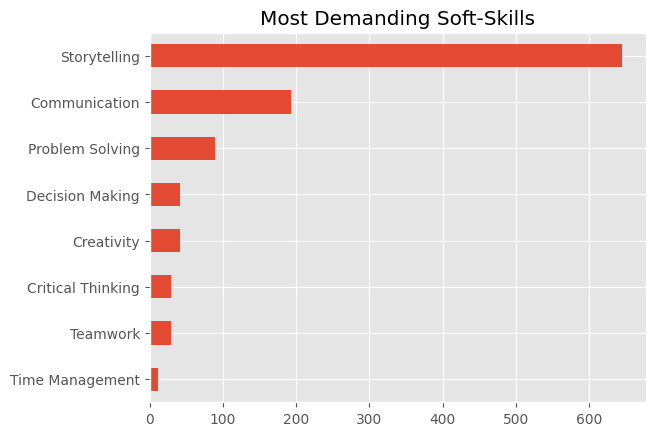

In [130]:
ax = df_soft_skills.sum().sort_values(ascending=False).plot(kind='barh', title='Most Demanding Soft-Skills')
ax.invert_yaxis();